In [1]:
using LinearAlgebra
using FFTW
using ToeplitzMatrices
using SpecialMatrices
using SparseArrays
using Plots

In [2]:
#fix Y1 & Y2

In [3]:
#b calculated from Shishegar's method
#the input data
#T from a to b with δt as step
a = -4.0
δt = 0.005
b = 7
T = a:δt:b
Y = T.^3 - 5*T.^2 -T
N = length(Y)
L = floor(Int, N/2)
M = 15
ϵ = 1e-10
##############################################################################################
#the algorithm

    #Hankel(first col,    last row  )
Y1 = Hankel(Y[1:N-L] ,Y[N-L:N-1])
Y2 = Hankel(Y[2:N-L+1] ,Y[N-L+1:N])
U, S, V = svd(I*Y1)                     #we could also work with svd(pinv(Y1))   
#if I wanna go with mr shishegar's code, I gotta use the meaningful eigenvalues! 
# and I'll do it:
Sr = S[abs.(S) .>= ϵ]                   #put meaningful values in "Sr" : means S reduced
(m,) = size(Sr)
Ur = U[:,1:m]
Vr = V[:,1:m]

Ze = inv(diagm(Sr))*Ur'*Y2*Vr
zi = (eigen(Ze).values) 
Poles = log.(zi)/δt

# #building up the rectangular vandermond matrix (it could be a contribution)
# v = Vandermonde(zi)
# vn = ceil(Int, N/m)
# V = v
# for i in 2:vn
#     V = [V diagm(zi).^i*v]
# end

# Z = V[:, 1:N]
# b = Y'*pinv(Z)
# #parameters done!
# Ypred = real.(b*Z)


#going with Mr Shishegr's method:
z1=zeros(Complex, N-L)

z1[1:m] = zi

z1 = Vandermonde(z1)

z1=z1[:,1:m]



z2=zeros(Complex, L)

z2[1:m] = zi

z2= Vandermonde(z2)

z2 = z2[1:m,:]

b=pinv(z1)*Y1*pinv(z2)
b=diag(b)
b=b./exp.(Poles*a)

Ypred = exp.((Poles*T')')*b


2201-element Vector{ComplexF64}:
 -1.1379689001161272e12 - 5.433820699578635e12im
 -1.1379615437109656e12 - 5.433848489238618e12im
 -1.1379541873060344e12 - 5.433876278898985e12im
 -1.1379468309013333e12 - 5.433904068559734e12im
 -1.1379394744968628e12 - 5.433931858220868e12im
  -1.137932118092622e12 - 5.433959647882386e12im
 -1.1379247616886116e12 - 5.433987437544285e12im
 -1.1379174052848308e12 - 5.434015227206568e12im
 -1.1379100488812793e12 - 5.434043016869235e12im
 -1.1379026924779568e12 - 5.434070806532281e12im
 -1.1378953360748638e12 - 5.434098596195711e12im
 -1.1378879796719993e12 - 5.434126385859522e12im
  -1.137880623269364e12 - 5.434154175523716e12im
                        ⋮
 -1.1218659508491423e12 - 5.494652764902569e12im
 -1.1218585944951926e12 - 5.494680554826823e12im
  -1.121851238141059e12 - 5.494708344750937e12im
 -1.1218438817867412e12 - 5.494736134674906e12im
 -1.1218365254322385e12 - 5.4947639245987295e12im
 -1.1218291690775515e12 - 5.494791714522412e12im
 -1.12182

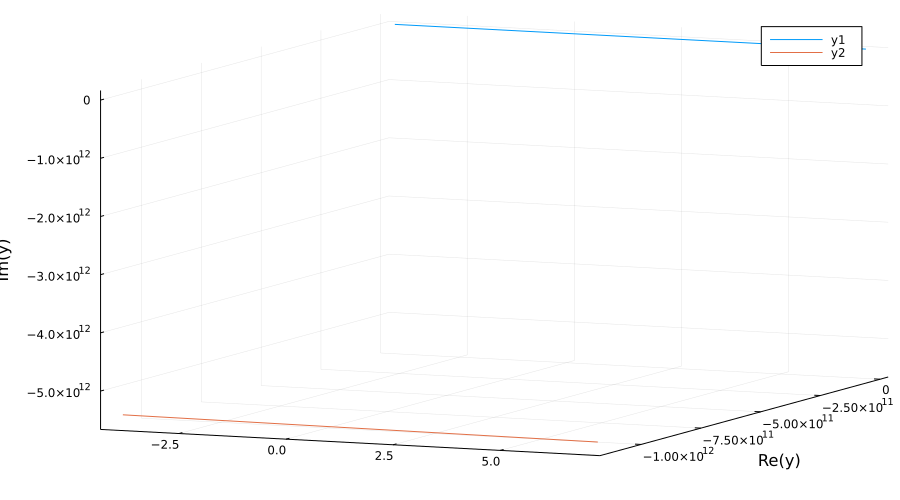

In [4]:
plot(T,[Y Ypred])
#plot(T,Y)

plot!(size=(900,500))

In [21]:
#b calculated from My method

#the input data
#T from a to b with δt as step
a = -4.0
δt = 1
b = 7
T = a:δt:b
Y = T.^3 - 5*T.^2 -T
N = length(Y)
L = floor(Int, N/2)
M = 15
ϵ = 1e-1
##############################################################################################
#the algorithm

    #Hankel(first col,    last row  )
Y1 = Hankel(Y[1:N-L] ,Y[N-L:N-1])
Y2 = Hankel(Y[2:N-L+1] ,Y[N-L+1:N])
U, S, V = svd(I*Y1)                     #we could also work with svd(pinv(Y1))   
#if I wanna go with mr shishegar's code, I gotta use the meaningful eigenvalues! 
# and I'll do it:
Sr = S[abs.(S) .>= ϵ]                   #put meaningful values in "Sr" : means S reduced
(m,) = size(Sr)
Ur = U[:,1:m]
Vr = V[:,1:m]

Ze = inv(diagm(Sr))*Ur'*Y2*Vr
zi = (eigen(Ze).values) 
Poles = log.(zi)/δt

#building up the rectangular vandermond matrix (it could be a contribution)

z=zeros(Complex, N)

z[1:m] = zi

Z = Vandermonde(z)

Z=Z[1:m,:]

b = Y'*pinv(Z)
#parameters done!
Ypred = real.(b*Z)


1×12 Matrix{Float64}:
 -140.0  -69.0001  -26.0002  -5.00012  …  -5.00018  29.9998  90.9999

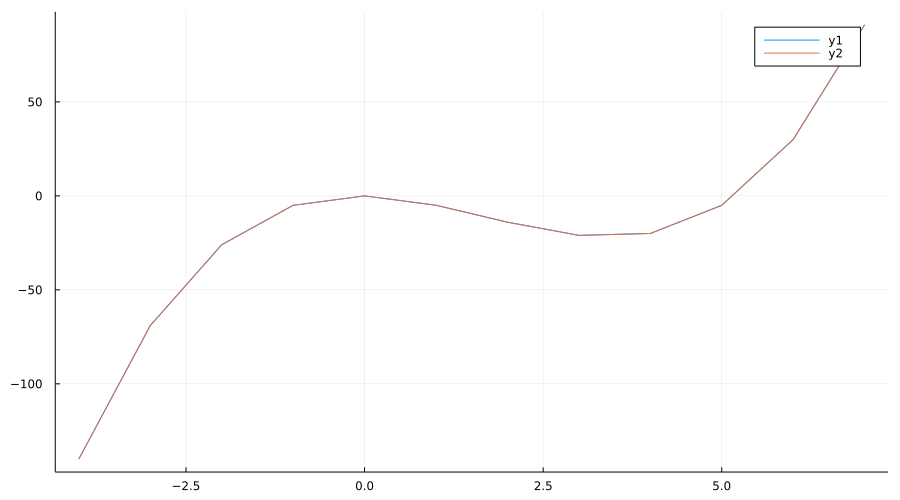

In [22]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))

In [12]:
#b calculated from My method

#the input data
#T from a to b with δt as step
a = -4.0
δt = 0.005
b = 7
T = a:δt:b
Y = Y = 100*sin.(2*5*π*T)
N = length(Y)
L = floor(Int, N/2)
M = 15
ϵ = 1e-10
##############################################################################################
#the algorithm

    #Hankel(first col,    last row  )
Y1 = Hankel(Y[1:N-L] ,Y[N-L:N-1])
Y2 = Hankel(Y[2:N-L+1] ,Y[N-L+1:N])
U, S, V = svd(I*Y1)                     #we could also work with svd(pinv(Y1))   
#if I wanna go with mr shishegar's code, I gotta use the meaningful eigenvalues! 
# and I'll do it:
Sr = S[abs.(S) .>= ϵ]                   #put meaningful values in "Sr" : means S reduced
(m,) = size(Sr)
Ur = U[:,1:m]
Vr = V[:,1:m]

Ze = inv(diagm(Sr))*Ur'*Y2*Vr
zi = (eigen(Ze).values) 
Poles = log.(zi)/δt

#building up the rectangular vandermond matrix (it could be a contribution)

z=zeros(Complex, N)

z[1:m] = zi

Z = Vandermonde(z)

Z=Z[1:m,:]

b = Y'*pinv(Z)
#parameters done!
Ypred = real.(b*Z)


1×2201 Matrix{Float64}:
 -4.98627e-12  15.6434  30.9017  45.399  …  -30.9017  -15.6434  4.64491e-12

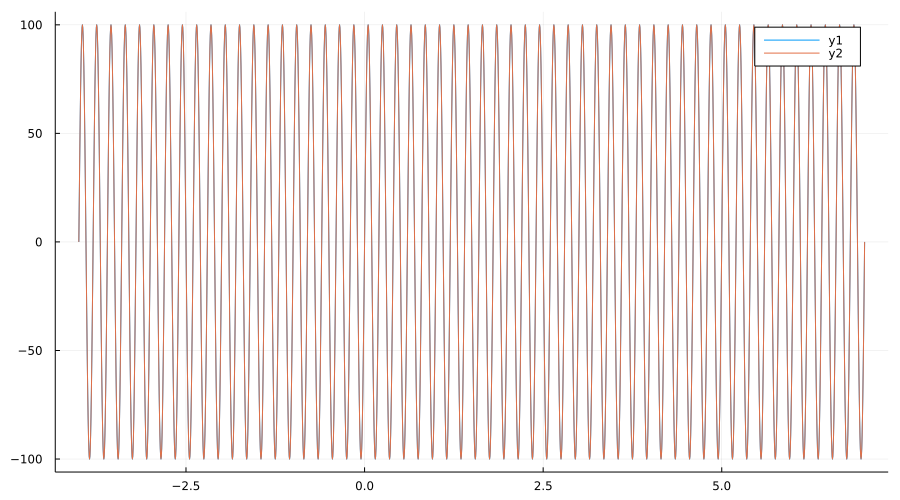

In [13]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))

In [16]:
b

1×2 adjoint(::Vector{ComplexF64}) with eltype ComplexF64:
 -2.49358e-12+50.0im  -2.49269e-12-50.0im

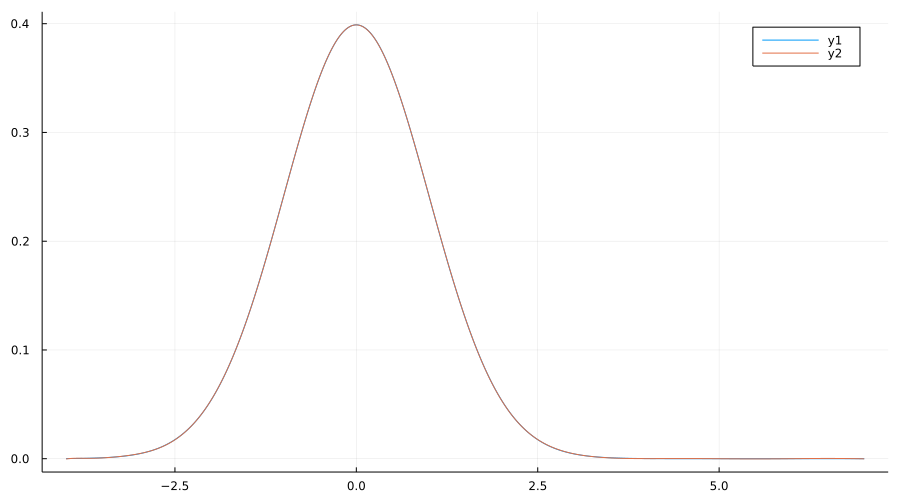

In [10]:
#b calculated from My method

#the input data
#T from a to b with δt as step
a = -4.0
δt = 0.005
b = 7
T = a:δt:b
Y = 1/sqrt(2π)*exp.(-(T.^2)/2)
N = length(Y)
L = floor(Int, N/2)
M = 15
ϵ = 1e-1

# ϵ = 1e-2
##############################################################################################
#the algorithm

    #Hankel(first col,    last row  )
Y1 = Hankel(Y[1:N-L] ,Y[N-L:N-1])
Y2 = Hankel(Y[2:N-L+1] ,Y[N-L+1:N])
U, S, V = svd(I*Y1)                     #we could also work with svd(pinv(Y1))   
#if I wanna go with mr shishegar's code, I gotta use the meaningful eigenvalues! 
# and I'll do it:
Sr = S[abs.(S) .>= ϵ]                   #put meaningful values in "Sr" : means S reduced
(m,) = size(Sr)
Ur = U[:,1:m]
Vr = V[:,1:m]

Ze = inv(diagm(Sr))*Ur'*Y2*Vr
zi = (eigen(Ze).values) 
Poles = log.(zi)/δt

#building up the rectangular vandermond matrix (it could be a contribution)

z=zeros(Complex, N)

z[1:m] = zi

Z = Vandermonde(z)

Z=Z[1:m,:]

b = Y'*pinv(Z)
#parameters done!
Ypred = real.(b*Z)


plot(T,[Y Ypred'])

plot!(size=(900,500))

In [11]:
m

8

In [10]:
#sin function
#T from a to b with δt as step
a = -2.0
δt = 0.01
b = 2
T = a:δt:b
Y = 100*sin.(2*π*T)
N = length(Y)
L = floor(Int, N/2)
M = 15
ϵ = 1e-15
##############################################################################################
#the algorithm

    #Hankel(first col,    lasr row  )
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
U, S, V = svd(I*Y1)                     #we could also work with svd(pinv(Y1))   
#if I wanna go with mr shishegar's code, I gotta use the meaningful eigenvalues! 
# and I'll do it:
Sr = S[abs.(S) .>= ϵ]                   #put meaningful values in "Sr" : means S reduced
(m,) = size(Sr)
Ur = U[:,1:m]
Vr = V[:,1:m]

Ze = inv(diagm(Sr))*Ur'*Y2*Vr
zi = (eigen(Ze).values) 
Poles = log.(zi)/δt

#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zi)
vn = ceil(Int, N/m)
V = v
for i in 2:vn
    V = [V diagm(zi).^i*v]
end

Z = V[:, 1:N]
b = Y'*pinv(Z)
#parameters done!
Ypred = real.(b*Z)
S

200-element Vector{Float64}:
 10049.87562112089
  9999.999999999996
     6.478413070055438e-12
     3.810560467583844e-12
     3.717174270478949e-12
     3.140011727012293e-12
     3.0966174851611795e-12
     2.8260518192582844e-12
     2.8239771365415325e-12
     2.7352398471428785e-12
     2.6022107582687576e-12
     2.525013022445909e-12
     2.407255446617894e-12
     ⋮
     1.004063139057542e-12
     1.004063139057542e-12
     1.004063139057542e-12
     1.004063139057542e-12
     9.99185707161094e-13
     6.480526193979229e-13
     5.676292770598984e-13
     5.063358550409272e-13
     4.966265281012934e-13
     4.925588265289716e-13
     4.1813914178699316e-13
     2.479306127906291e-13

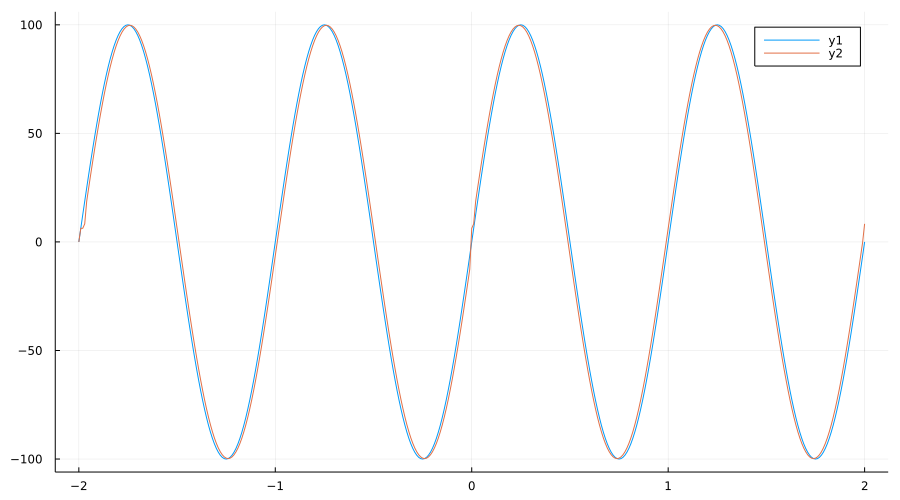

In [11]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))

In [12]:
#sin function higher frequency
#T from a to b with δt as step
a = -2.0
δt = 0.01
b = 2
T = a:δt:b
Y = 100*sin.(2*10*π*T)
N = length(Y)
L = floor(Int, N/2)
M = 15
ϵ = 1e-12
##############################################################################################
#the algorithm

    #Hankel(first col,    lasr row  )
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
U, S, V = svd(I*Y1)                     #we could also work with svd(pinv(Y1))   
#if I wanna go with mr shishegar's code, I gotta use the meaningful eigenvalues! 
# and I'll do it:
Sr = S[abs.(S) .>= ϵ]                   #put meaningful values in "Sr" : means S reduced
(m,) = size(Sr)
Ur = U[:,1:m]
Vr = V[:,1:m]

Ze = inv(diagm(Sr))*Ur'*Y2*Vr
zi = (eigen(Ze).values) 
Poles = log.(zi)/δt

#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zi)
vn = ceil(Int, N/m)
V = v
for i in 2:vn
    V = [V diagm(zi).^i*v]
end

Z = V[:, 1:N]
b = Y'*pinv(Z)
#parameters done!
Ypred = real.(b*Z)
S

200-element Vector{Float64}:
 10049.875621120891
 10000.000000000002
     1.0773131721114212e-11
     1.0490259847713318e-11
     1.0346386999402666e-11
     1.0201875733659249e-11
     8.926082647349968e-12
     7.285564296446665e-12
     6.930042484966403e-12
     6.760189091653981e-12
     6.527181994423575e-12
     6.470850590829638e-12
     6.457189644375128e-12
     ⋮
     6.719401786097843e-13
     6.70383070142022e-13
     6.437017214161927e-13
     6.143175786764538e-13
     6.042502358591922e-13
     5.923643014379005e-13
     5.236726737794952e-13
     5.1109998596228e-13
     4.63531207856103e-13
     3.9721266359287074e-13
     2.2464749094319289e-13
     2.2236133537675034e-13

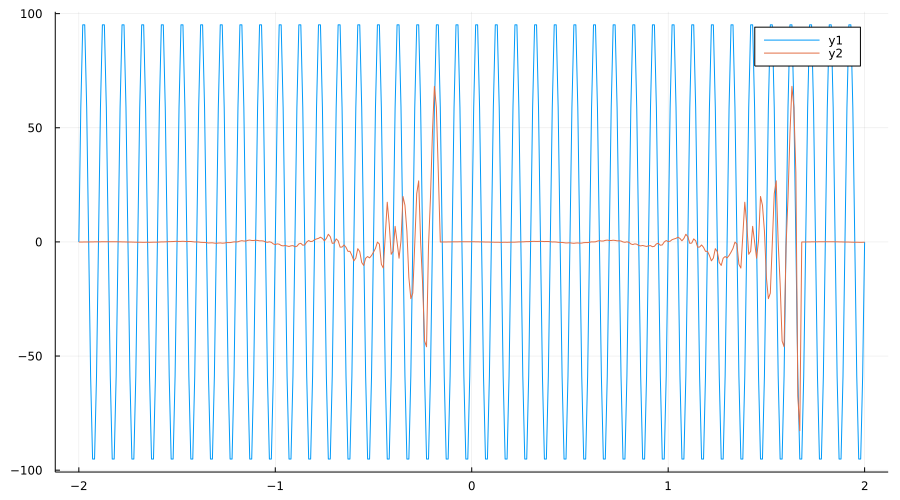

In [13]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))

In [136]:
#normal function
#T from a to b with δt as step
a = -2.0
δt = 0.01
b = 2
T = a:δt:b
Y = 1/sqrt(2π)*exp.(-(T.^2)/2)
N = length(Y)
L = floor(Int, N/2)
M = 15
ϵ = 1e-1
##############################################################################################
#the algorithm

    #Hankel(first col,    lasr row  )
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
U, S, V = svd(I*Y1)                     #we could also work with svd(pinv(Y1))   
#if I wanna go with mr shishegar's code, I gotta use the meaningful eigenvalues! 
# and I'll do it:
S[abs.(S) .< ϵ] .= 0                    #zero out values smaller than treshold
Sr = S[abs.(S) .!= 0]                   #put nonzero values in "Sr" : means S reduced
(m,) = size(Sr)
Ur = U[:,1:m]
Vr = V[:,1:m]

Ze = inv(diagm(Sr))*Ur'*Y2*Vr
zi = (eigen(Ze).values) 
Poles = log.(z)/δt

#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zi)
vn = ceil(Int, N/m)
V = v
for i in 2:vn
    V = [V diagm(zi).^i*v]
end

Z = V[:, 1:N]
b = Y'*pinv(Z)
#parameters done!
Ypred = real.(b*Z)
Sr

4-element Vector{Float64}:
 61.71438866256754
 15.931065612486302
  2.14305929171165
  0.18591177464995456

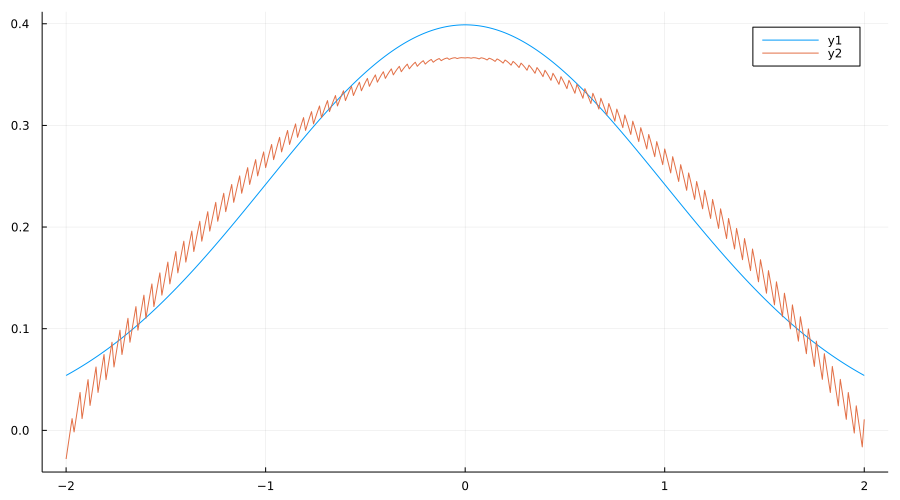

In [137]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))